<a href="https://colab.research.google.com/github/NguyenQuanManh/TTNT/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_anh = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_anh_set = train_anh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/Train_NDM',target_size=(150,150), batch_size=32, class_mode='categorical')
test_set = train_anh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 153 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_anh_set,epochs=20,batch_size=128,verbose=1, validation_data=test_set)

Epoch 1/20
5/5 [==============================] - 70s 15s/step - loss: 3.0369 - accuracy: 0.5229 - val_loss: 2.1791 - val_accuracy: 0.3333
Epoch 2/20
5/5 [==============================] - 37s 7s/step - loss: 0.8622 - accuracy: 0.6732 - val_loss: 0.6731 - val_accuracy: 0.6667
Epoch 3/20
5/5 [==============================] - 35s 6s/step - loss: 0.3253 - accuracy: 0.8693 - val_loss: 0.1538 - val_accuracy: 1.0000
Epoch 4/20
5/5 [==============================] - 38s 8s/step - loss: 0.1564 - accuracy: 0.9542 - val_loss: 0.0611 - val_accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 35s 6s/step - loss: 0.0913 - accuracy: 0.9673 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 37s 7s/step - loss: 0.0273 - accuracy: 0.9935 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 35s 7s/step - loss: 0.0296 - accuracy: 0.9935 - val_loss: 6.5145e-04 - val_accuracy: 1.0000
Epoch 8/20
5/5 [=============

In [ ]:
model.save('Nhandienmatnguoi.h5')

In [ ]:
model_anh = load_model('Nhandienmatnguoi.h5')

1/1 [==============================] - 0s 70ms/step
[[1.0000000e+00 1.0907121e-10 6.1801730e-15]]
1/1 [==============================] - 0s 69ms/step
Đây là: Mạnh


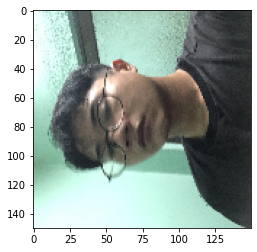

1/1 [==============================] - 0s 59ms/step
[[5.901432e-17 1.000000e+00 3.881835e-15]]
1/1 [==============================] - 0s 89ms/step
Đây là: Ngọc


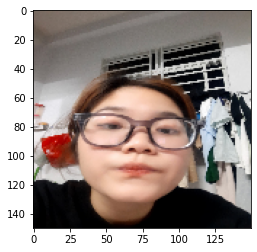

1/1 [==============================] - 0s 64ms/step
[[8.290708e-11 5.606578e-10 1.000000e+00]]
1/1 [==============================] - 0s 69ms/step
Đây là: Tài


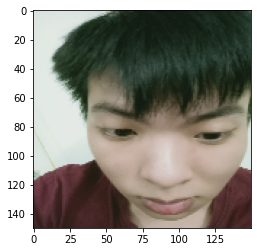

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/data/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_anh.predict(img)
  class_name=['Mạnh','Ngọc','Tài']
  print(model.predict(img))
  a= int(np.argmax(model.predict(img),axis=1))
  print("Đây là:", class_name[a])
  plt.show()

In [ ]:
! jupyter nbconvert --to html /content/nhandienmat.ipynb

[NbConvertApp] Converting notebook /content/nhandienmat.ipynb to html
[NbConvertApp] Writing 594200 bytes to /content/nhandienmat.html
